In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import matplotlib.ticker as ticker
pd.options.display.max_rows = 100
pd.options.display.max_columns = None
%matplotlib inline 

merged_df = pd.read_csv('../UsedData/Merged_ratings_movies_revenue.csv')
merged_df = merged_df[(merged_df.revenue > 0) & (merged_df.budget >0)]

In [32]:
merged_df.head(2)

,movieId,title,date,Comedy,Romance,Drama,Children,Crime,Mystery,Action,Documentary,Fantasy,Thriller,Horror,Animation,Adventure,Sci-Fi,(no genres listed),War,Western,Musical,IMAX,Film-Noir,imdb_id,revenue,adult,overview,budget,profit,genre,AvgRating,NumInteractions
12,170875,The Fate of the Furious,2017,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,tt4630562,1.238765e+09,False,When a mysterious woman seduces Dom into the w...,250000000.0,988764765.0,Action,3.215777,862
13,168060,Rings,2017,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,tt0498381,8.308089e+07,False,"Julia becomes worried about her boyfriend, Hol...",25000000.0,58080890.0,Horror,2.272059,136


   date   profit_mean    profit_std            genre
0  2014  4.022250e+08  3.509923e+08  Science Fiction
1  2014  3.136627e+08  2.401968e+08              War
2  2014  3.134066e+08  2.490454e+08          Fantasy
3  2014  2.603032e+08  1.855989e+08        Adventure
4  2015  1.082731e+09           NaN           Family


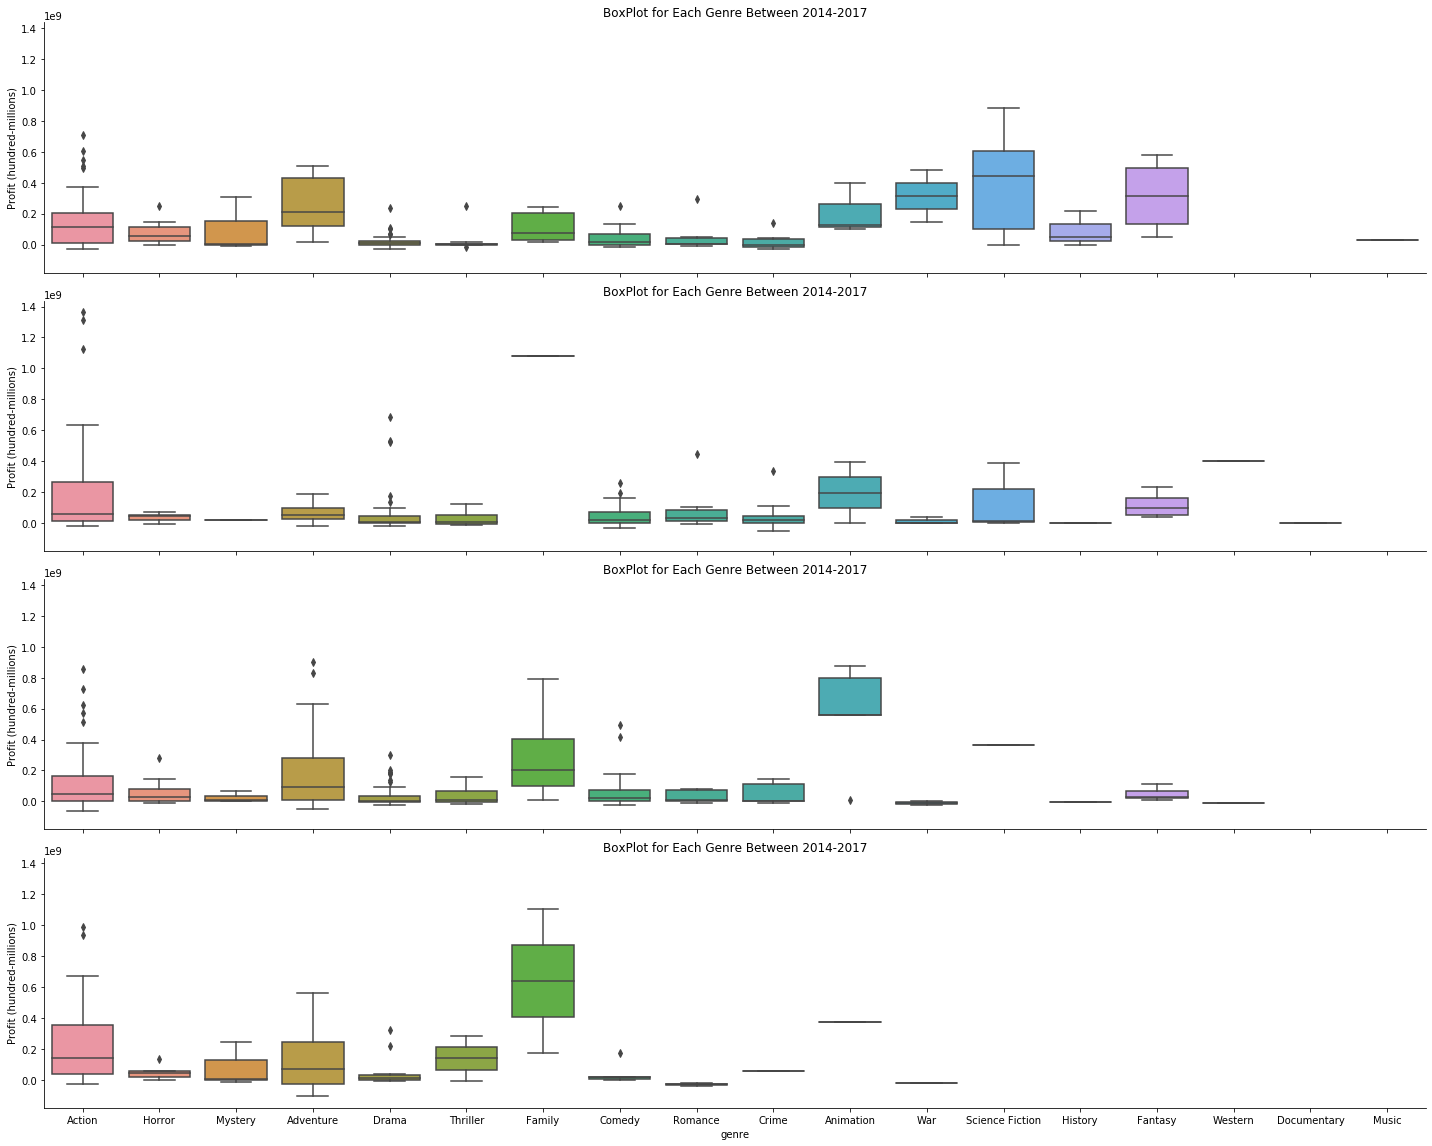

In [33]:
from collections import defaultdict
import seaborn as sns

# X = ['A','B','C']
# Y = [1,2,3]
# Z = [2,3,4]


def box_plot(df, year, column): 
    labels = {'#eeefff':'Action', '#F1F906': 'Drama', '2': 'Comedy', '3': 'Adventure', 
                 '4': 'Horror', '5': 'Thriller', '6': 'Crime', '7': 'Family', 
                 '8': 'Animation', '9': 'Romance', '10': 'Mystery', 
                 '11': 'Fantasy', '12': 'War', '13': 'Science Fiction', '14': 'Documentary', '15': 'History', '16': 'Music'}
    genre_dic = defaultdict(list)#{value:[] for key, value in labels.items()}
    year_dic = defaultdict(list)
    years = list(range(year, 2021))
    #fig, ax = plt.subplots(figsize=(12,8))
    df = df[(df.revenue > 0) & (df.budget > 0)]
    df = df[df.date.isin(years)]
    #df = df[df.genre.isin(['Action', 'Science Fiction', 'Animation', 'Adventure', 'Comedy', 'Drama'])]
    date_grouped = df.groupby(['date', 'genre']).agg({f'{column}': ['mean', 'std']}).reset_index()
    date_grouped = date_grouped.sort_values(by =['date', ('profit', 'mean')])
    new_df = pd.DataFrame(columns = [i for i in date_grouped.columns])
    for y in years: 
        year_df = date_grouped[date_grouped.date == y]
        year_df_sort = year_df.sort_values(by =[('profit', 'mean')], ascending = False)
        #new_year_df = pd.DataFrame({'x': [year_df_sort.date.values]})
        new_df = new_df.append(year_df_sort.head(4), ignore_index = True)
        year_df_sort = year_df_sort.head(4)
        #print(year_df_sort, year_df_sort.columns)
#         for g in year_df_sort[('genre', '')].values:
#             row = year_df_sort[year_df_sort[('genre', '')] == g]
#             x = row[('date', '')].values
#             y = row[('profit', 'mean')].values 
#             ax.plot(x,y,label = g)
        

    new_df['date'] = new_df[('date','')].map(lambda x: x)
    new_df['profit_mean'] = new_df[('profit','mean')].map(lambda x: x) 
    new_df['profit_std'] = new_df[('profit','std')].map(lambda x: x)
    new_df['genre'] = new_df[('genre','')].map(lambda x: x)


    new_df.drop([('date',''), ('profit','mean'), ('profit','std'), ('genre','')], axis =1, inplace = True)
    print(new_df.head())
    new_df.sort_values(by = 'date', ascending = False, inplace = True)
    #g = sns.catplot(x = 'date', y = 'profit_mean', data = new_df,hue = 'genre', kind = 'bar', ci = 'profit_std')#, kind = 'box', orient = 'h')
    #g = sns.catplot(x = 'date', y = 'profit', data = df, hue = 'genre', kind = 'bar', ci = 'sd', height =5, aspect = 3)# col = 'date', kind = 'bar', capsize =.2)
    ax = sns.catplot(x = 'genre', y = 'profit', row = 'date', data = df, kind = 'box', height =4, aspect =5)
    ax.set(ylabel = 'Profit (hundred-millions)', title = f'BoxPlot for Each Genre Between {year}-2017')
    ax.savefig(f'../PlotImages/BoxPlot_genres_{year}.png')

box_plot(merged_df, 2014, 'profit')

{'Action': '#eeefff', 'Drama': '#F1F906', 'Comedy': '2', 'Adventure': '3', 'Horror': '4', 'Thriller': '5', 'Crime': '6', 'Family': '7', 'Animation': '8', 'Romance': '9', 'Mystery': '10', 'Fantasy': '11', 'War': '12', 'Science Fiction': '13'}


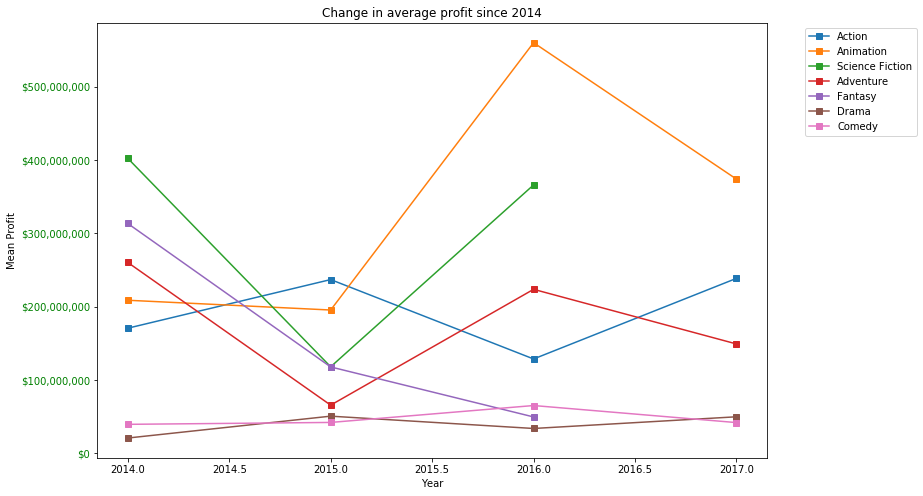

In [74]:
def line_change(df, year, column, genres): 
    num_dic = {'#eeefff':'Action', '#F1F906': 'Drama', '2': 'Comedy', '3': 'Adventure', 
                 '4': 'Horror', '5': 'Thriller', '6': 'Crime', '7': 'Family', 
                 '8': 'Animation', '9': 'Romance', '10': 'Mystery', 
                 '11': 'Fantasy', '12': 'War', '13': 'Science Fiction'}
    genre_dic = {value:key for key, value in num_dic.items()}
    
    print(genre_dic)
    df = df[df.date >= year]
    fig, ax = plt.subplots(figsize=(12,8))
    #genres = df.genre.value_counts()
    for g in genres: 
        g_df = df[df.genre == g].groupby('date')
        profit_means = g_df.profit.mean()
        
        ax.plot(profit_means.index,profit_means, label = g, marker = 's')# , c = genre_dic[g], linestyle = marker)
        
    lgnd = plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
    formatter = ticker.StrMethodFormatter('${x:,.0f}')
    ax.yaxis.set_major_formatter(formatter)
    for tick in ax.yaxis.get_major_ticks(): 
        tick.label1.set_visible(True)
        tick.label2.set_visible(False)
        tick.label1.set_color('green')
    plt.title(f'Change in average profit since {year}')
    plt.xlabel('Year')
    plt.ylabel('Mean Profit')
    plt.savefig('../PlotImages/change_over_time.png', bbox_inches = 'tight')

line_change(merged_df, 2014, 'profit', ['Action', 'Animation', 'Science Fiction', 'Adventure', 'Fantasy', 'Drama', 
                                       'Comedy'])

In [3]:
grouped_df = merged_df.groupby(['Action', 'Drama', 'Adventure', 'Comedy', 'Animation'])


In [ ]:
#     new_grouped_year = new_df.groupby(['date', 'genre'])
#     new_grouped_year.plot.bar()

    
#     for y in years: 
#         year_df = df[df.date == y].groupby('genre')
#         mean_col = year_df.agg({f'{column}': ['mean', 'std']}).sort_values(by = ('profit', 'mean'),
#                                                                            ascending = False).head(4)
#         mean_col.plot.bar()
#         #print(mean_col)
#         #ax.bar(mean_col.index, mean_col[('profit', 'mean')])
#         if len(mean_col) == 0: 
#             continue
#         year_dic[y] = mean_col
#     print(year_dic)
#     x = [key for key, i in year_dic.items()]
#     y = [i[('profit', 'mean')].values for key, i in year_dic.items()]
    
#     print(x)
#     print(y)
        
#         for i in mean_col.index:
#             genre_dic[i].append(mean_col[i])
#     print(genre_dic)
#     label_loc = np.arange(len(genre_dic))
#     l = [key for key in genre_dic.keys()]
#     width = .35
#     fig, ax = plt.subplots(figsize=(12,8))
#     print(l)
#     for y in years:
#         l = genre_dic.keys()
#         ax.bar(label_loc - width/2, genre_dic[], width, label='Men')
    #rects2 = ax.bar(x + width/2, women_means, width, label='Women')

            
    
    
#     men_means = [20, 34, 30, 35, 27]
#     women_means = [25, 32, 34, 20, 25]

#     x = np.arange(len(labels))  # the label locations
#     width = 0.35  # the width of the bars



#     # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax.set_ylabel('Scores')
#     ax.set_title('Scores by group and gender')
#     ax.set_xticks(x)
#     ax.set_xticklabels(labels)
#     ax.legend()